<a href="https://colab.research.google.com/github/ParkHyeon-Ji/ITB2022/blob/main/IT%EC%99%80_%EB%B9%84%EC%A6%88%EB%8B%88%EC%8A%A4_%ED%98%81%EC%8B%A0_%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *가족자원경영학과 1912975 박현지*

**종속 변수** - 음주여부

**독립 변수** - 음주여부를 제외한 모든 변수 

**사용한 분류 모델** - 의사결정나무와 랜덤포레스트

**사용한 분류 모델 평가** - 교차 검증


# **전처리 전 데이터 불러오기 및 기본 세팅**

In [ ]:
#한글 폰트 깨짐 방지 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,770 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
#mglearn 라이브러리 사용 
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=7fe5fe574c87247d2ab99d81e4238c338b9746932d3578af033638e802f6bc15
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 5.3 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
import mglearn

In [ ]:
#데이터 불러오기 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import pandas as pd
#Seaborn, pyplot(Matplotlib 로딩)
import seaborn as sns         
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#건강 데이터 파일 가져오기 
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITHOMEWORK/health_data.csv", encoding='cp949')

In [ ]:
#데이터가 잘 옮겨졌는지 확인하기
display(health.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

None

In [ ]:
health

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/21
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/21
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/21
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/21
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/21
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/21
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/21
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/21


In [ ]:
#건강 데이터 변수 타입 확인 
health.dtypes

기준년도             int64
가입자일련번호          int64
시도코드             int64
성별코드            object
연령대코드(5세단위)      int64
신장(5Cm단위)        int64
체중(5Kg 단위)       int64
허리둘레           float64
시력(좌)          float64
시력(우)          float64
청력(좌)            int64
청력(우)            int64
수축기혈압          float64
이완기혈압          float64
식전혈당(공복혈당)     float64
총콜레스테롤         float64
트리글리세라이드       float64
HDL콜레스테롤       float64
LDL콜레스테롤       float64
혈색소            float64
요단백            float64
혈청크레아티닌        float64
(혈청지오티)AST     float64
(혈청지오티)ALT     float64
감마지티피          float64
흡연상태            object
음주여부            object
구강검진수검여부         int64
치아우식증유무        float64
치석             float64
데이터공개일자         object
dtype: object

In [ ]:
#문자형 변수를 수치형 변수로 변환
health['성별코드'].replace("M", 0, inplace=True)
health['성별코드'].replace("F", 1, inplace=True)

health['흡연상태'].replace("Yes", 1, inplace=True)
health['흡연상태'].replace("No", 0, inplace=True)
health['흡연상태'].replace("NotNow", 2, inplace=True)


health['음주여부'].replace("Yes", 1, inplace=True)
health['음주여부'].replace("No", 0, inplace=True)

health.fillna(0, inplace=True)

health['데이터공개일자'].replace("12/29/21", 0, inplace=True)

health

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,0,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,0.0,0.0,0,0.0,0.0,0
1,2020,2,27,1,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,0.0,0.0,0,0.0,0.0,0
2,2020,3,11,1,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,0.0,0.0,0,0.0,0.0,0
3,2020,4,31,0,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,0.0,0.0,1,0.0,0.0,0
4,2020,5,41,1,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,0.0,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,1,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,0.0,1.0,0,0.0,0.0,0
9996,2020,9997,43,1,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,0.0,1.0,1,0.0,0.0,0
9997,2020,9998,45,0,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,0.0,0.0,0,0.0,0.0,0
9998,2020,9999,27,1,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,0.0,0.0,0,0.0,0.0,0


# 분류 모델 만들기 

# 의사결정나무

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#종속 변수 번호 확인
display(health.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  int64  
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        10000 non-null  float64
 13  이완기혈압        10000 non-null  float64
 14  식전혈당(공복혈당)   10000 non-null  float64
 15  총콜레스테롤       10000 non-null  float64
 16  트리글리세라이드     10000 non-null  float64
 17  HDL콜레스테롤     10000 non-null  float64
 18  LDL콜레스테롤     10000 non-null  float64
 19  혈색소  

None

In [ ]:
#독립변수(26번 음주여부를 제외한 변수들)
aa = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30]
X = health.iloc[:,aa]
#종속변수(26번 음주여부)
y = health.iloc[:, 26] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
#학습용 데이터 정확도와 시험용 데이터 정확도 확인 
tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.633


In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.729
시험용 데이터 정확도: 0.716


<인사이트 도출>

1. random_State는 0으로 고정하고 max_depth를 설정하였을 때와 하지 않았을 때의 결과가 다르다는 것을 알 수 있다. 
2. max_depth를 사용하였을 때는 그 숫자를 1에서 10까지 모두 넣어 셀을 실행해보았고 결과적으로 depth를 5로 지정했을때 시험용 데이터 정확도가 가장 컸다. 
3. max_depth를 실행 하지 않았을 때 학습용 데이터 정확도는 1이었지만 후자는 조금 낮아짐을 알 수 있고 반대로 시험용 데이터 정확도는 max_depth를 실행하였을 때 더 높게 나왔음을 알 수 있다. 


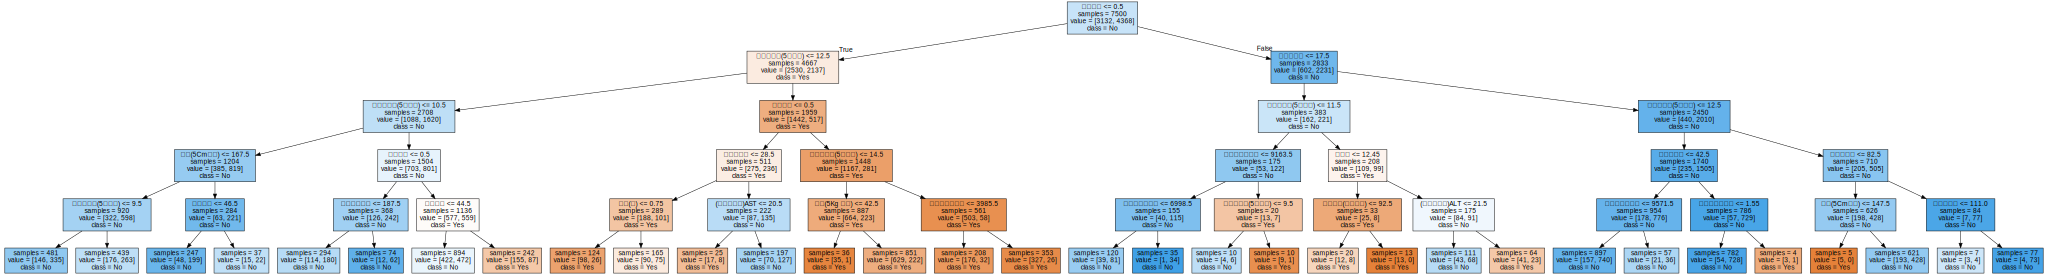

In [ ]:
#의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=[ "Yes", "No"],
                feature_names=health.columns[aa], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

<인사이트 도출>

의사결정나무를 시각화 하였을 때 감마지티피와 연령대코드의 독립변수가 그 중요도가 가장 높다고 볼 수 있다

In [ ]:
#변수들의 중요도 확인
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.01677062 0.01442866 0.07321563 0.35687735 0.01249308
 0.00395948 0.         0.0089567  0.         0.         0.
 0.00192044 0.         0.00265984 0.00634831 0.         0.
 0.         0.00451365 0.         0.00389355 0.00493417 0.00549285
 0.07942878 0.40410688 0.         0.         0.         0.        ]


<인사이트 도출>
1. 중요도 점수를 0에서부터 보았을 때 가장 높은 점수의 중요도를 가진 변수는 그 중요도가 0.404이라고 볼 수 있으며 반대로 가장 낮은 점수의 중요도는 0의 점수를 가지고 있다

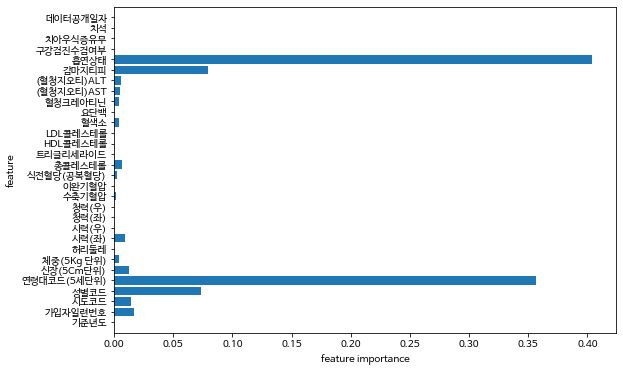

In [ ]:
#막대그래프로 중요 변수도 보기 
import numpy as np

def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health.columns[1:]) 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health.columns[aa]) 
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) 

plot_feature_importances_health(tree)

<인사이트 도출>

1. 흡연상태가 중요도가 가장 큰 변수라고 볼 수 있으며 연령대코드, 감마지티피,성별코드 등도 차례대로 그 중요도를 이어가고 있다는 것을 알 수 있다. 
2. 그래프를 보았을 때 ALT와 혈색소와 같이 다소 막대가 짧은 것은 중요도가 떨어진다.
3. 콜레스테롤과 청력과 같은 변수들은 숫자가 0이고 막대가 보이지는 않지만 중요성이 없는 것은 아니며 음주여부와 모두 상관관계가 있다. 

# 랜덤 포레스트 (Random forest)

In [ ]:
#랜덤 포레스트 만들기

from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.717


<인사이트 도출>

1. 의사결정나무 자체를 랜덤하게 복수로 만든 후 평균을 사용하는 것이기 때문에 결과가 더 좋게 나왔다는 것을 알 수 있다. 
2. 학습용 데이터 세트 정확도는 max_depth를 정하지 않았을 때에 의사결정나무와 그 값이 비슷하지만 depth를 정했을 때의 의사결정나무보다는 높았다. 
3. 시험용 데이터 세트 정확도는 depth를 정하지 않았을 때와 정했을 때의 의사결정나무보다 정확도 결과가 높게 나왔음을 알 수 있다. 

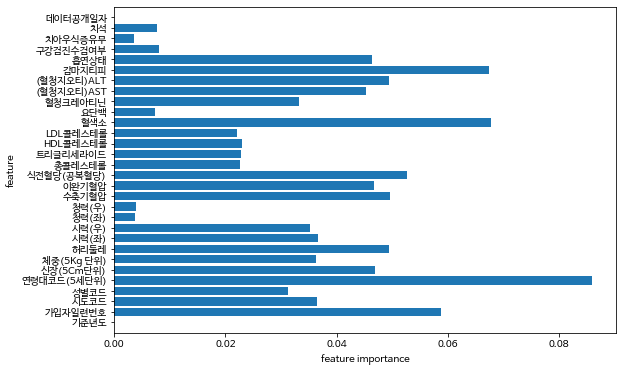

In [ ]:
#변수들의 중요도 확인 
plot_feature_importances_health(forest)

In [ ]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨

<인사이트 도출>

1. 의사결정나무의 막대그래프보다 중요성이 높은 변수들이 더 많음을 알 수 있다.
2. 앞선 막대그래프와 다르게 이번에는 연령대코드가 가장높은 중요도를 차지하였고 (의사결정나무에서는 연령대코드), 앞서 볼 수 없었던 혈색소가 이번에는 연령대 코드 다음으로 긴 막대를 가지고 있다는 것을 알 수 있다. 
3. 또한 감마지티피는 앞선 막대그래프와 비슷한 중요성을 띄고 있음을 알 수 있고 
반대로 AST와 ALT,청력 등과 같이 아예 막대가 없거나 정말 미미했던 변수들도 이번 막대 그래프에서는 높은 중요성을 띄고 있다. 
4. 랜덤포레스트에서는 데이터공개일자와 기준년도와 같이 사실상 관련이 없는 변수들을 제외한 모든 변수들이 그 중요성이 두드러지고 있다. 



# 교차 검증을 이용한 분류 모델 평가

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
dt_scores = cross_val_score(tree, X_train, y_train, cv=6, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=6, scoring='accuracy')

In [ ]:
#교차검증을 통한 각 모델의 정확도 보기
print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

Accuracy
Decision tree:  [0.7304 0.704  0.6864 0.7144 0.704  0.7   ]
Random forest:  [0.7272 0.7072 0.6888 0.7192 0.7024 0.7144]


In [ ]:
#평균을 이용한 교차검증을 통해 각 모델의 정확도 보기
print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) #알고싶은건 mean값
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy mean
Decision tree :0.707
Random forest :0.710


<최종 인사이트 도출>

1. 6번의 교차검증을 실행하고 각 평균 정확도를 비교해보았을 때 결론적으로 랜덤 포레스트의 평균 정확도가 의사결정나무의 평균 정확도보다 우수하다는 것을 알 수 있다. 
2. 교차 검증을 굳이 사용하지 않았어도 앞선 과정을 통해 랜덤 포레스트가 더 우수힌정확도를 보유하고 있음을 볼 수 있다.
3. 의사결정나무와 다르게 랜덤포레스트는 의사결정나무를 복수로 만들고 이를의 평균을 정확도 계산에 사용하기 때문에 의사결정나무보다 그 성능과 결과가 더욱 좋으며 이는 교차검증을 통해 숫자로 검증이 되었다.
4. 랜덤 포레스트가 최적의 모델이다. 